## Big Data Mart Sales Problem
Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

The dataset includes two files:

- bigdatamart_Train.csv: Use this file for the model building purpose. 

- bigdatamart_Test.csv: Use this file for getting predictions from the trained model. 

In [1]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
# Set display options for readibility 
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

# Import necessary libraries from sklearn lib. 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Pickle for saving final model 
import pickle

# XGBoost library for xgboost plots 
import sys
!{sys.executable} -m pip install xgboost
from sklearn.datasets import load_boston

# Import warnings library to keep notebook clean 
import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb

In [2]:
# Load in training, testing, sample datasets 
train = pd.read_csv('train_datamart.csv')
test = pd.read_csv('test_datamart.csv')

## Exploratory Data Analysis 

In [3]:
train.shape
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year    float64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [4]:
# check dimensions of dataframes 
print(train.shape)
print(test.shape)

(2361, 12)
(4514, 11)


In [5]:
# review first 5 entries to ensure dataframe loaded successfully 
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016,Dairy,249.809,OUT049,1999.000,Medium,Tier 1,Supermarket Type1,3735.138
1,DRC01,5.920,Regular,0.019,Soft Drinks,48.269,OUT018,2009.000,Medium,Tier 3,Supermarket Type2,443.423
2,FDN15,17.500,Low Fat,0.017,Meat,141.618,OUT049,1999.000,Medium,Tier 1,Supermarket Type1,2097.270
3,FDX07,19.200,Regular,0.000,Fruits and Vegetables,182.095,OUT010,1998.000,NaN,Tier 3,Grocery Store,732.380
4,NCD19,8.930,Low Fat,0.000,Household,53.861,OUT013,1987.000,High,Tier 3,Supermarket Type1,994.705


In [6]:
# review first 5 entries to ensure dataframe loaded successfully 
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.008,Snack Foods,107.862,OUT049,1999.000,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038,Dairy,87.320,OUT017,2007.000,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.100,Others,241.754,OUT010,1998.000,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015,Snack Foods,155.034,OUT017,2007.000,NaN,Tier 2,Supermarket Type1
4,FDY38,nan,Regular,0.119,Dairy,234.230,OUT027,1985.000,Medium,Tier 3,Supermarket Type3


In [7]:
# quick check of all features in df 
print(train.columns)
print(test.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [8]:
# use describe function to get summary stats 
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,1962.000,2361.000,2360.000,2360.000,2360.000
mean,13.011,0.066,140.233,1997.797,2183.693
std,4.639,0.051,62.440,8.335,1738.703
min,4.590,0.000,31.290,1985.000,33.290
25%,8.897,0.027,92.636,1987.000,811.943
50%,13.000,0.055,142.730,1999.000,1760.042
75%,17.000,0.094,185.377,2004.000,3078.659
max,21.350,0.328,265.223,2009.000,11445.102


In [9]:
# use describe function to get summary stats 
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,3736.000,4514.000,4513.000,4513.000
mean,12.694,0.065,141.089,1997.851
std,4.670,0.051,61.916,8.388
min,4.555,0.000,31.990,1985.000
25%,8.645,0.027,94.412,1987.000
50%,12.350,0.054,141.715,1999.000
75%,16.712,0.092,186.090,2004.000
max,21.350,0.324,266.588,2009.000


In [10]:
# combine training and testing sets to save effort in data cleaning 
#total_df=train
total_df = pd.concat([train, test], axis=0)
# check dimensions to ensure combination 
print(total_df.shape)

(6875, 12)


## Univariate Analysis

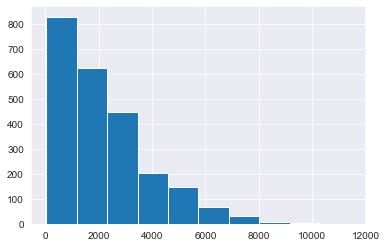

In [11]:
# hist of item outlet sales to preview distribution 
train.Item_Outlet_Sales.hist()
plt.show()

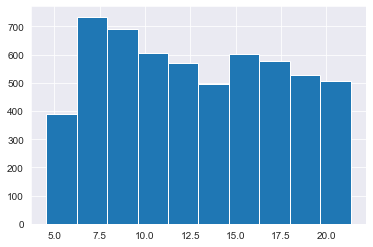

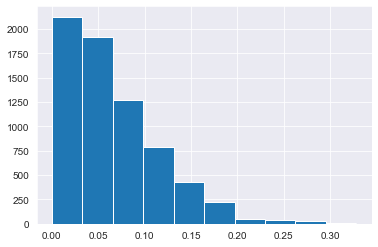

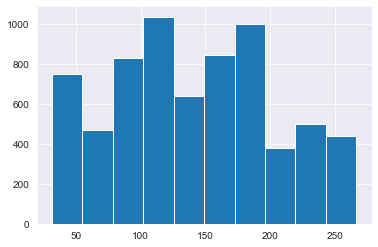

In [12]:
# plot histograms of weight, visibility, MRP to view distributions 
total_df.Item_Weight.hist()
plt.show()
total_df.Item_Visibility.hist()
plt.show()
total_df.Item_MRP.hist()
plt.show()

Some initial observations: there seems to be no clear cut pattern in Item Weight, there is a clear right-skewness to Item Visibility, and there are 4 different distrubtions present in Item MRP. 

Next, we'll start reviewing our categorical variables. First, let's plot Item_Fat_Content. 

<AxesSubplot:>

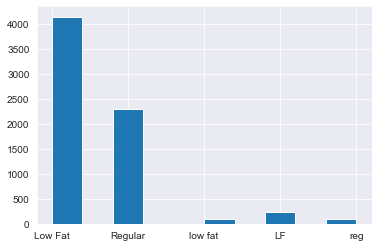

In [13]:
total_df.Item_Fat_Content.hist()

There are some repetitive categorical features here, so we can combine them. For example, Low fat, LF, and low fat are all the same category! 

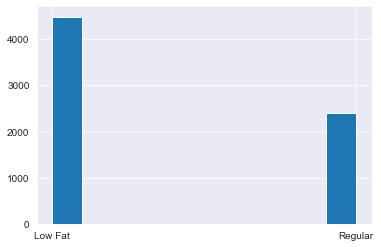

<Figure size 360x360 with 0 Axes>

In [14]:
# replace categorical features in groups 
total_df.Item_Fat_Content.replace(['LF', 'low fat'], 'Low Fat', 
                                  inplace=True)
total_df.Item_Fat_Content.replace('reg', 'Regular', inplace=True)

# graph new hist 
total_df.Item_Fat_Content.hist()
plt.figure(figsize=(5,5))
plt.show()

Now, let's check the other categorical variables.

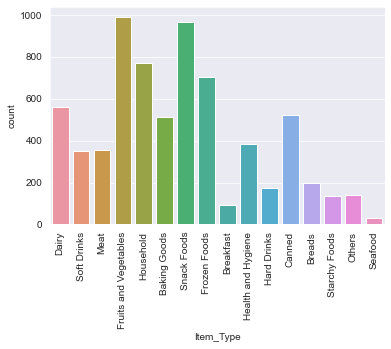

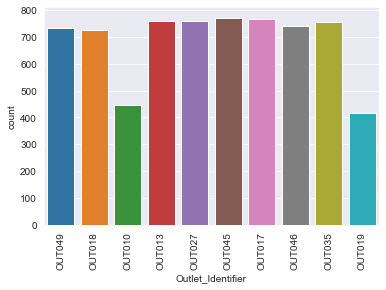

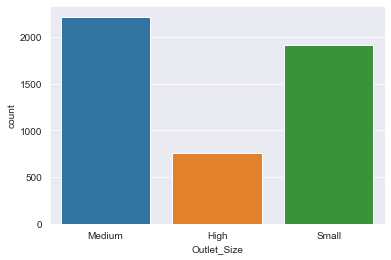

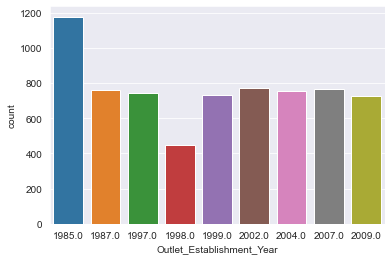

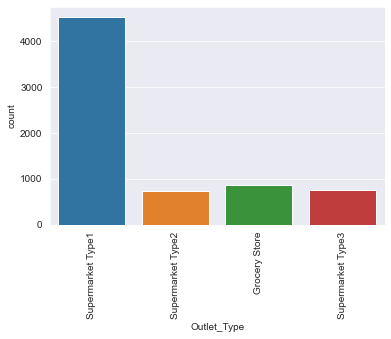

In [15]:
sns.countplot(total_df.Item_Type)
plt.xticks(rotation=90)
plt.show()

sns.countplot(total_df.Outlet_Identifier)
plt.xticks(rotation=90)
plt.show()

sns.countplot(total_df.Outlet_Size)
plt.show()

sns.countplot(total_df.Outlet_Establishment_Year)
plt.show()

sns.countplot(total_df.Outlet_Type)
plt.xticks(rotation=90)
plt.show()

Some additional observations: There aren't many observations in the year of 1998 and Supermarket Type 1 is clearly the most popular. 

## Bivariate Analysis

Now that I have explored features individually, I'll begin to look at features with respect to our target variables. The objective of bivariate analysis is to discover hidden relationships between independent variables and the target variable. 

In [16]:
# resplit df into train and test set 
train = total_df.iloc[1:8523]
test = total_df.iloc[8524:]

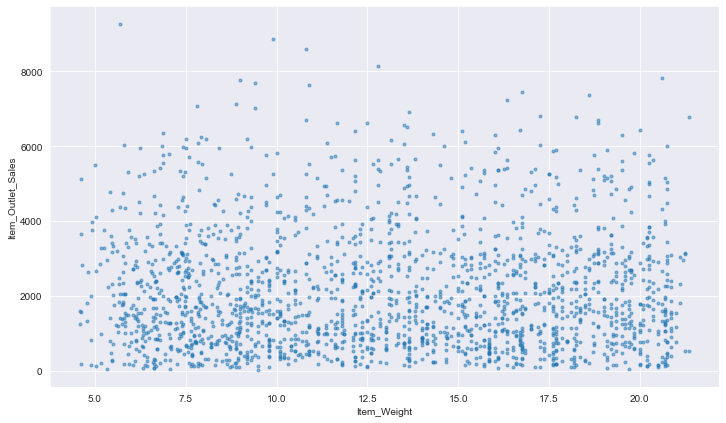

In [17]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.plot(train.Item_Weight, train["Item_Outlet_Sales"], '.', alpha=0.5)

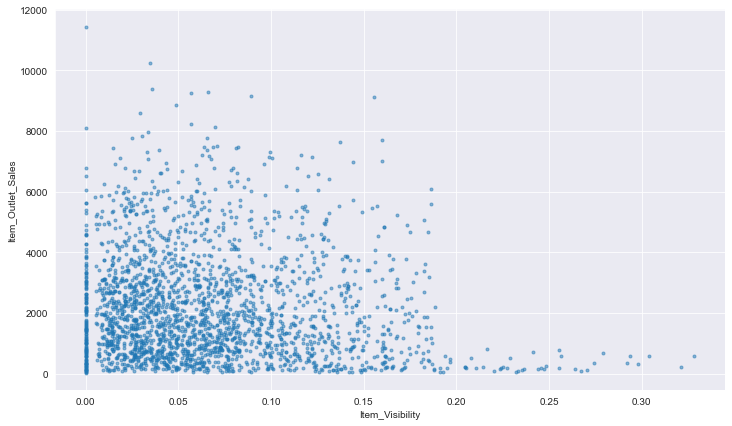

In [18]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.plot(train.Item_Visibility, train["Item_Outlet_Sales"],'.', alpha = 0.5)

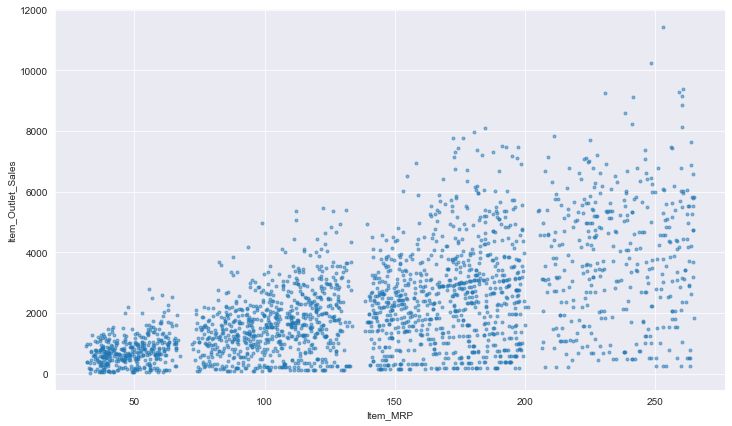

In [19]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.plot(train.Item_MRP, train["Item_Outlet_Sales"],'.', alpha = 0.5)

Observations: 
#### 1. Item_Outlet_Sales is spread well across the entire range of Item_Weight 
#### 2. Item_Visibility vs. Item_Outlet_Sales produces a stretch where Item_Visbility is 0, which is impossible. 
#### 3. Item_MRP vs. Item_Outlet_Sales produces 4 segments of prices that can be used in feature engineering.

Next, we will graph the target variable against our categorical variables. By doing so, I can check the distrubtion of my target variable across all categorical variables using a violinplot. 

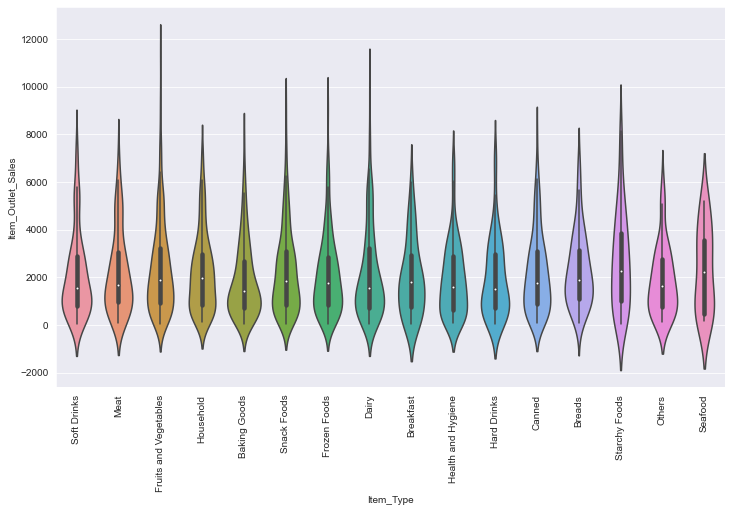

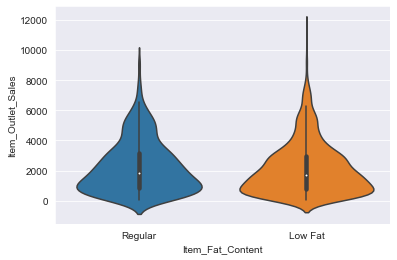

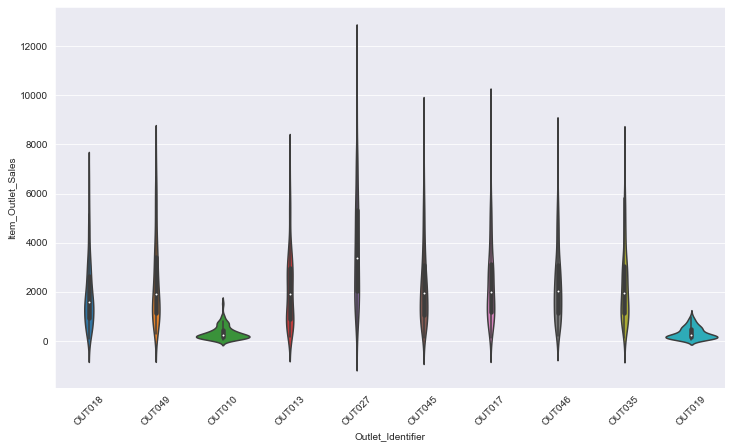

In [20]:
plt.figure(figsize=(12,7))
sns.violinplot(train.Item_Type, train.Item_Outlet_Sales)
plt.xticks(rotation=90)
plt.show()

sns.violinplot(train.Item_Fat_Content, train.Item_Outlet_Sales)
plt.show()

plt.figure(figsize=(12,7))
sns.violinplot(train.Outlet_Identifier, train.Item_Outlet_Sales)
plt.xticks(rotation=45)
plt.show()

Observations: 
#### 1. Distribution of Item_Outlet_Sales across Item_Type is not very distinct, which is the same pattern as Item_Outlet_Sales vs. Item_Fat_Content. 
#### 2. The distribution of OUT010 and OUT019 are similar and very unique from other Outlets. 

Next, we must address the missing values present in Outlet_Size. Although it does not show up on our graph, analysis of the dataset shows numerous missing values in Outlet_Size.

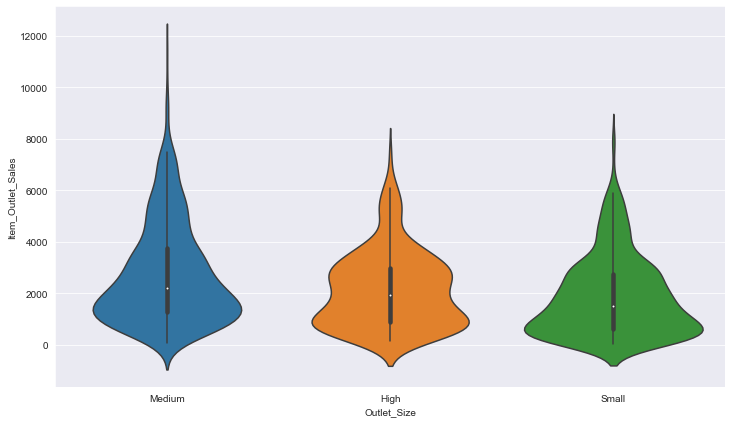

In [21]:
plt.figure(figsize=(12,7))
sns.violinplot(train.Outlet_Size, train.Item_Outlet_Sales)
plt.show()

<AxesSubplot:xlabel='Outlet_Size'>

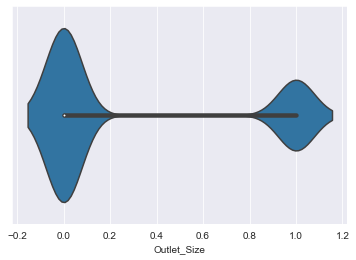

In [22]:
sns.violinplot(train['Outlet_Size'].isnull())

Clearly, there is a small distribution of outlets that do not have a size variable. Since they are 'Missing', we will fill them in with the Small Outlet Size for the time being, as their distributions are fairly similar. 

In [23]:
total_df['Outlet_Size'].fillna('Small', inplace=True)
total_df['Outlet_Size'].isnull().sum()

0

With that fixed, we can go on to further examining other variables and their effects on our target. 

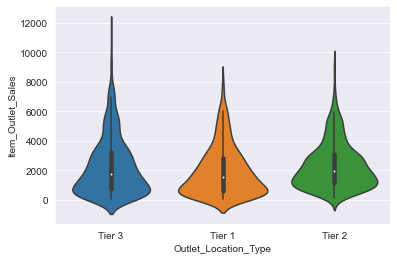

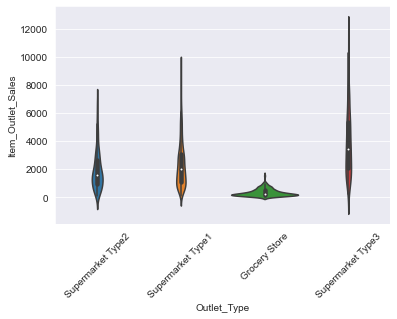

In [24]:
sns.violinplot(train.Outlet_Location_Type, train.Item_Outlet_Sales)
plt.show()

sns.violinplot(train.Outlet_Type, train.Item_Outlet_Sales)
plt.xticks(rotation=45)
plt.show()

Observations: 
#### 1. Tier 1 and Tier 3 have very similar distributions. 
#### 2. In the Outlet_Type violinplot, the Grocery Stores have more points at lower sales numbers than any other type. 

## Missing Value Treatment

In [25]:
# Display number of missing values by feature (categorical)
total_df.select_dtypes(include=['object']).isnull().sum()
# Display number of missing values by feature (numeric)
total_df.select_dtypes(exclude=['object']).isnull().sum()

Item_Weight                  1177
Item_Visibility                 0
Item_MRP                        2
Outlet_Establishment_Year       2
Item_Outlet_Sales            4515
dtype: int64

As we can see, we have numerous missing values in Item_Weight and Item_Outlet_Sales. In this section, I will go about adjusting this missing data. Note: Missing data in Item_Outlet_Sales can be ignored as they belong to the test dataset. 

To fix the missing values in Item_Weight, I will impute the mean of weights based on the Item_Identifier. 

In [26]:
item_weight_avg = total_df.pivot_table(values='Item_Weight', index='Item_Identifier')
print(item_weight_avg)

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115
...                      ...
NCZ30                  6.590
NCZ41                 19.850
NCZ42                 10.500
NCZ53                  9.600
NCZ54                 14.650

[1540 rows x 1 columns]


Now that each items mean weight has been found, we can fill in missing weight values with the average weight of the respective item. This is done using my custom helper function, fill_item_weight. 

In [ ]:
# function def to fill in missing weight 
def fill_item_weight(columns): 
    total_weight = columns[0]
    ID = columns[1]
    if pd.isnull(total_weight): 
        return item_weight_avg['Item_Weight'][item_weight_avg.index==ID]
    else: 
        return total_weight 

# apply function to df 
total_df['Item_Weight'] = total_df[['Item_Weight', 'Item_Identifier']].apply(fill_item_weight, axis=1).astype(float)

# check for missing vals (should be 0)
print(total_df['Item_Weight'].isnull().sum())
# Display number of missing values by feature (numeric)
total_df.select_dtypes(exclude=['object']).isnull().sum()

Next, I will go about adjusting my Item_Visibility observations. In the EDA portion, I saw that a lot of products had a Item_Visibility of 0, which is impossible as all products must be visible to customers. So, to fix this issue, I will use a similar tactic as above and impute the item's visibility mean based on its identifier. 

In [ ]:
# calculate mean weight of each item ID 
item_vis_avg = total_df.pivot_table(values='Item_Visibility', index='Item_Identifier')
print(item_vis_avg)

In [ ]:
# function to fill missing visibility with mean based on item ID 
def fill_item_vis(columns): 
    vis = columns[0]
    item = columns[1]
    if vis == 0: 
        return item_vis_avg['Item_Visibility'][item_vis_avg.index==item]
    else: 
        return vis 

# apply function to df 
total_df['Item_Visibility'] = total_df[['Item_Visibility', 'Item_Identifier']].apply(fill_item_vis,axis=1).astype(float)

# check for missing vals 
print(sum(total_df['Item_Visibility'] == 0))

In [ ]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.plot(total_df.Item_Visibility, total_df["Item_Outlet_Sales"],'.', alpha = 0.5)

As we can see, the features that had a value of 0 are no longer present. In addition, we can clearly see a few more observations towards the right than the graph produced in the EDA. Now that my missing values have been fixed, I can move onto feature engineering! 

## Feature Engineering

Now that my dataset is clean and no longer has missing values, I am ready to begin working on the dataset and making adjustments. This portion, called feature engineering, allows me to create more features (variables/columns). This allows for more comparisons amongst variables, further enhancing the model I will build based on this dataset. 

I plan on creating five new features, listed below: 
#### 1. Item_Type_New: Broader categories for Item_Type 
#### 2. Item_Category: Categorical variable based on Item_Identifer 
#### 3. Outlet_Years: Years of operation for outlets. 
#### 4. Item_MRP_Clusters: Binned feature based on Item_MRP 
#### 5. price_per_unit_wt: Item_MRP/Item_Weight 

First, I will create the feature 'Item_Type_New'. This creates new categories for item types, broken down into perishable, non-perishable, and not sure. 

In [ ]:
# create arrays to identify which type the item is 
perishable = ["Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood"]
non_perishable = ["Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene", "Household", "Soft Drinks"]

# create new feature in array and apply label bsaed on item type 
total_df['Item_Type_New'] = ["perishable" if i in perishable 
                             else "non_perishable" if i in non_perishable
                             else "not_sure" for i in total_df.Item_Type]
# drop old column 
total_df = total_df.drop('Item_Type', axis=1)

print(total_df['Item_Type_New'])

In addition, we can create the feature Item_Category by labeling the items as 'DR' (drink), 'FD' (food), or 'NC' (non-consumable). 

In [ ]:
# Save the first 2 chars of the item ID 
total_df['Item_Category'] = total_df['Item_Identifier'].apply(lambda x: x[0:2])

# Create new feature and store observations 
total_df['Item_Category'] = total_df['Item_Category'].map({'FD':'Food', 
                                                        'NC':'Non-Consumable', 
                                                        'DR':'Drinks'})
# drop old column 
total_df = total_df.drop('Item_Identifier', axis=1)

# check # of vals in each category 
total_df['Item_Category'].value_counts()

Next, I will make a quick adjustment to the Item Fat Content column. Since non-consumable items cannot have a fat content, I will fill those observations with the value of "Non-Edible". 

In [ ]:
total_df.loc[total_df['Item_Category']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
total_df['Item_Fat_Content'].value_counts()

Furthermore, I will create a new feature named Outlet_Years, keeping track of how long each store has been in business. 

In [ ]:
total_df['Outlet_Years'] = 2013 - total_df['Outlet_Establishment_Year']
total_df['Outlet_Years'].describe()

Next, I'll create the price_per_unit_wt feature. 

In [ ]:
total_df['price_per_unit_wt'] = total_df['Item_MRP']/total_df['Item_Weight']
total_df['price_per_unit_wt'].describe()

Finally, I will create my last feature in MRP Clusters. This gives me an estimation of each item's MRP without needed the exact value. 

In [ ]:
total_df['Item_MRP_Clusters'] = ["1st" if i < 69 
                                 else "2nd" if i >= 69 and i < 136
                                 else "3rd" if i >= 136 and i < 203
                                 else "4th" for i in total_df.Item_MRP]
print(total_df['Item_MRP_Clusters'])

## Encoding Categorical Variables

First, I will label encode Outlet_Size and Outlet_Location_Type. Label encoding is turning categorical variables into numerical values. 

In [ ]:
# overwrite outlet size observations with numerical values 
total_df['Outlet_Size'] = ["0" if i == "Small"
                           else "1" if i == "Medium"
                           else "2" for i in total_df.Outlet_Size]

# overwrite outlet location type observations with numerical values 
total_df['Outlet_Location_Type'] = ["0" if i == "Tier 3"
                                    else "1" if i == "Tier 2"
                                    else "2" for i in total_df.Outlet_Location_Type]

For the final portion of encoding categorical variables, I will one hot encode the categorical variables. This is done by creating 3 new variables for each category, filled with observations of 0/1 binary values. These values indicate whether an observation was recorded or not. This can be done with the dummies function in the Pandas library. 

In [ ]:
total_df = pd.get_dummies(data=total_df, columns = ['Item_Fat_Content', 
                                                    'Outlet_Location_Type', 
                                                    'Outlet_Size', 
                                                    'Outlet_Type', 
                                                    'Item_Type_New', 
                                                    'Item_Category', 
                                                    'Item_MRP_Clusters', 
                                                    'Outlet_Identifier'])
# check type of new variables 
total_df.dtypes

Finally, after encoding the categorical variables and making them numerical values, I can now remove the categorical features in the dataframe. 

## Preprocessing Data

Now that my data is clean and I have created and edited my custom features, I can begin processing my data before feeding it to my model. This step includes dealing with data skewness and the scale of our numerical variables. 

First, I will remove skewness from my dataset. This is because skewness is undesirable for predictive modeling, as normally distributed data is better for machine learning algorithms. To remove the skew, I will define a function to normalize the data. 

In [ ]:
def normalize(column): 
    up = column.max()
    low = column.min()
    total = (column - low)/(up - low)
    return total

# normalize data using function 
final_normalized = normalize(total_df.Item_Visibility)
final_normalized.describe()

Much better! The standard deviation from mean is far lower than before. 

The next method of preprocessing my data is scaling the numeric predictors. This means centering these numeric values around a mean of 0, with a standard deviation on a scale from 0 to 1. This scaling is necessary for my linear regression models. 

In [ ]:
float_array = total_df['Item_Outlet_Sales'].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array.reshape(-1, 1))
total_df['Item_Outlet_Sales'] = scaled_array
total_df['Item_Outlet_Sales']

Before moving on, I want to get a better understanding of the relationships between variables in my dataset. To do so, I will build a correlation heat map, allowing me to see how strong the relationship is between all variables. 

In [ ]:
total_df.head()

In [ ]:
#create the correlations object 
correlations = total_df.corr()
# Make the figsize 10 x 8
plt.figure(figsize=(14,14))
# Plot heatmap of annotated correlations
sns.heatmap(correlations * 100, 
            fmt='.0f', 
            annot = True, 
            cmap = 'RdBu_r')
plt.show()

## Model Building

Finally, we are at the most interesting step of the process! I will now get into building my predictive model. I will begin with modeling my dataset using linear models, then move on to more complex models such as RandomForest and XGBoost. 

First, I will have to split my complete dataset into training and test sets, which will be used for different purposes in the model building phase. I will use training sets to help fit the model, then use the test sets to evaluate each models' performance. 


### separating original test and train


In [ ]:
train = total_df[:8522]
test = total_df[8523:]

# split x and y into train,test sets 
x = train.drop('Item_Outlet_Sales',axis=1)
y = train.Item_Outlet_Sales

#x_train, y_train = train_test_split(x, y, test_size=0.39, random_state=123)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=123)
print(len(x_train), len(y_train), len(y_test), len(x_test))

After the training and test sets have been created, I can get into fitting my models! First up is Linear Regression. 

In [ ]:
from math import sqrt

# create linear regression object 
lm = LinearRegression()

# fit LR model with datasets  
lm.fit(x_train, y_train)

# predict values using Linear Regression model 
pred = lm.predict(x_test)

# print model performance stats 
print('R^2', r2_score(y_test, pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('RMSE:', sqrt(mean_squared_error(y_test, pred)))

Unfortunately, Linear Regression isn't the best at modeling and predicting values, as the predicted values show us. Going forward, I will create pipeline and hyperparameter dictionaries to assist with building and fitting the four other models. 

In [ ]:
# create pipelines dictionary, creates and stores each model 
pipelines = { 
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'rf' : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))    
}

# declare hyperparameters for models, change model fit 
lasso_hyperparameters = { 
    'lasso__alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 5, 10]  
}

# Random forest hyperparameters
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

# Boosted tree hyperparameters
gb_hyperparameters = { 
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

# Create complete hyperparameters dictionary
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters
}

With pipelines and hyperparameters declared, I can now get into fitting these models. The pipelines store the actual model object, while the hyperparameters tune the model for smaller changes. We will test each hyperparameter using a GridSearchCV object, storing the best models in the fitted_models dictionary.

In [ ]:
# create fitted models dictionary 
fitted_models = {}

for name, pipeline in pipelines.items(): 
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # fit model 
    model.fit(x_train, y_train)
    
    # store models 
    fitted_models[name] = model
    
    # print success msg 
    print(name, 'has been fitted')

Now that my model has been fitted, I can begin evaluating model performance. The first way to compare model performance is through the .best_score_ function. In addition, I will display the R^2 and MAE values for each model for further comparison.

In [ ]:
# display model best score from each of saved models 
for name, model in fitted_models.items(): 
    print(name, model.best_score_)

print('-----')
print('-----')
# display model stats (R^2 and MAE)
for name, model in fitted_models.items(): 
    pred = model.predict(x_test)
    print(name)
    print('-----')
    print('R^2', r2_score(y_test, pred))
    print('MAE:', mean_absolute_error(y_test, pred))
    print('RMSE:', sqrt(mean_squared_error(y_test, pred)))

Finally, the last step! After creating and fitting each of the five models, it is clear by the evaluation metrics that the Random Forest Regressor model is best at modeling Item Outlet Sales. Now, I can graph the model's performance and predicted values against the actual, expected values! Let's see how I did! 

In [ ]:
# display best model performance 
rf_pred = fitted_models['rf'].predict(x_test)
plt.scatter(rf_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

Nice!!! The model turned out fairly accurate! After the entire machine learning project, I have learned that given a large dataset of sales information, the Random Forest Regressor model is best at predicting the ultimate amount of Item Sales per Outlet. 